## Data Science Assignment



Name: Muhammad Aqhari Nasrin Bin Ramli

E-mail : muhammad.aqhari.nasrin@gmail.com

## Overview

The main objective of this task is to perform a predicatory analysis on the data set to predict the 'label' based on numerical features provided in the "data.csv" file.

## Importing the Dependencies

In [1]:
import numpy as np                                    # to create numpy array
import pandas as pd                                   # to loading data into data frame
import matplotlib.pyplot as plt                       # to draw a graph
import seaborn as sns                                 # used for data visualization and exploratory data analysis
from sklearn.model_selection import train_test_split  # to split the data into training data and test data
from sklearn.ensemble import RandomForestClassifier   # to use Random Forest Classifier model
from sklearn.metrics import accuracy_score            # checking the accuracy of the model

## Exploratory Data Analysis (EDA)

In [2]:
#loading data into pandas dataframe
data = pd.read_csv('data.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,label
0,7.814237,-0.084,-0.298,-0.062,-0.321,-0.071,-0.235,9.71383,-0.045,443.847,...,0.050456,-25.606,-0.841356,-0.19302,-0.12006,0.050456,17.3734,0.005456,-0.278094,A
1,-0.125697,-0.130,2.900,-2.016,1.196,-0.392,-0.361,10.86430,-0.053,457.446,...,0.059082,-16.461,0.867605,-0.18317,-0.11182,0.051831,17.4348,0.006082,7.540777,A
2,0.892034,-0.067,-0.279,-1.386,2.377,-0.109,1.692,10.14610,-0.059,428.860,...,0.062515,-11.661,1.469185,-0.22228,-0.12084,0.058892,17.3416,0.003515,1.229768,A
3,-0.544446,-0.178,-0.149,-0.923,-0.266,-0.184,-0.294,10.05160,-0.059,459.425,...,0.049802,9.185,0.022207,-0.18457,-0.11476,0.048468,17.3010,-0.009198,-0.325045,A
4,0.725064,-0.277,-0.271,1.382,-0.215,-0.126,-0.333,9.67063,-0.055,421.000,...,0.046542,-7.400,0.250386,-0.18701,-0.11799,0.047495,17.4342,-0.008458,-0.489567,A


In [3]:
# number of rows and column

data.shape

(10241, 154)

The datasets contain 10,241 rows and 154 columns

# Checking for missing data

In [4]:
data.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
149      0
150      0
151      0
152      0
label    0
Length: 154, dtype: int64

None of the data is missing

# Checking for unique value in 'label' column

In [5]:
data['label'].value_counts()

A    10000
B      101
C       59
D       52
E       29
Name: label, dtype: int64

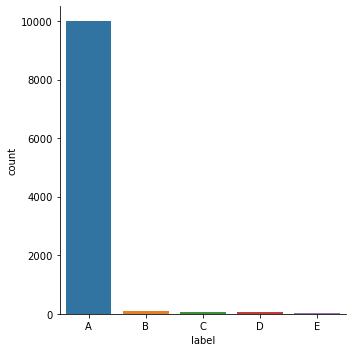

In [6]:
sns.catplot(x='label', data = data, kind = 'count')  # number of unique values of each label

# Statistical measures of data

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,...,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,0.127977,-0.018351,-0.045335,-0.016402,0.074057,0.004281,-0.007069,10.162148,-0.037253,440.690561,...,-0.021312,0.050167,-7.314472,-0.003216,-0.195913,-0.120027,0.050307,17.452579,0.012914,0.116282
std,2.018572,0.597846,0.637736,0.953677,0.960843,0.749460,0.781811,1.086576,0.218479,22.920082,...,0.158499,0.007329,19.009677,1.008505,0.016852,0.006041,0.007461,0.309245,0.218503,1.284415
min,-5.480920,-0.442000,-0.647000,-2.989000,-0.517000,-0.501000,-0.585000,6.931490,-0.190000,373.688000,...,-0.163000,0.025462,-71.396000,-2.139501,-0.225480,-0.134270,0.021371,16.488000,-0.129709,-0.703326
25%,-0.710242,-0.179000,-0.303000,-0.773000,-0.310000,-0.190000,-0.310000,9.364720,-0.059000,427.281000,...,-0.039000,0.045284,-23.548000,-0.975703,-0.215400,-0.125170,0.045284,17.244000,-0.010955,-0.422425
50%,-0.055867,-0.113000,-0.261000,-0.028000,-0.282000,-0.126000,-0.278000,10.031200,-0.051000,439.011000,...,-0.024000,0.049835,-3.945000,0.230574,-0.188750,-0.120090,0.050065,17.453900,-0.001982,-0.330906
75%,0.694998,-0.076000,-0.196000,0.648000,-0.239000,-0.078000,-0.239000,10.832700,-0.045000,451.337000,...,-0.010000,0.054840,10.529000,0.875909,-0.181530,-0.114890,0.054958,17.659600,0.006053,-0.205713
max,57.246035,8.995000,5.757000,3.446000,9.443000,14.743000,13.556000,15.187900,5.189000,713.481000,...,3.838000,0.086035,28.328000,14.013760,-0.174830,-0.105990,0.109032,19.577500,5.230795,14.353956


## Pearson Correlation

In [8]:
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,1.000000,0.002652,-0.010912,0.038575,0.050106,0.008386,0.002332,0.170790,0.009473,0.164587,...,-0.003026,0.156966,0.039079,0.046398,-0.000989,-0.007058,0.154031,-0.186368,0.014737,-0.044113
1,0.002652,1.000000,0.025079,-0.019532,0.057252,0.026692,0.009735,0.003058,-0.002971,0.077088,...,0.023909,-0.010128,0.030099,0.017664,-0.007949,0.017670,0.002905,0.003298,-0.003310,0.046815
2,-0.010912,0.025079,1.000000,-0.022597,0.025652,0.062363,0.029748,-0.014507,0.004909,0.035047,...,0.026449,-0.058947,0.004268,-0.020856,0.007271,-0.007262,-0.057631,0.018983,0.002931,0.058118
3,0.038575,-0.019532,-0.022597,1.000000,-0.006409,0.014378,-0.009156,0.052911,0.024982,0.033303,...,-0.007293,0.054383,-0.004121,0.031578,0.014448,-0.131368,0.043999,-0.047019,0.026803,-0.010383
4,0.050106,0.057252,0.025652,-0.006409,1.000000,0.049617,0.030180,-0.013041,0.161708,0.064465,...,0.033625,-0.039982,0.021497,0.012219,0.000106,-0.019168,-0.035356,0.027186,0.160349,0.044330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-0.007058,0.017670,-0.007262,-0.131368,-0.019168,0.018775,-0.011769,0.011637,-0.003308,-0.037196,...,0.017956,0.018550,0.024721,-0.015459,0.002174,1.000000,0.019307,-0.016183,-0.002685,0.000315
149,0.154031,0.002905,-0.057631,0.043999,-0.035356,-0.046457,-0.002921,0.709164,-0.016122,0.151563,...,0.020335,0.858772,0.193551,0.079420,0.012018,0.019307,1.000000,-0.476468,0.012684,-0.091942
150,-0.186368,0.003298,0.018983,-0.047019,0.027186,0.038369,0.024858,-0.655851,0.001657,-0.213781,...,0.019582,-0.479179,-0.198321,-0.021305,-0.014014,-0.016183,-0.476468,1.000000,-0.014415,0.058078
151,0.014737,-0.003310,0.002931,0.026803,0.160349,0.021355,0.001585,0.017964,0.999437,0.049312,...,-0.003393,0.020106,0.007183,0.018527,-0.001049,-0.002685,0.012684,-0.014415,1.000000,0.005067


The table shows correlation between columns. 

# Separating the data

Separate the data to dependent and independent variables that can be used for predictions.

In [9]:
# separate the data and Label
X = data.drop('label',axis=1)
Y = data['label']

X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [10]:
print(X.head())

          0      1      2      3      4      5      6         7      8  \
0  7.814237 -0.084 -0.298 -0.062 -0.321 -0.071 -0.235   9.71383 -0.045   
1 -0.125697 -0.130  2.900 -2.016  1.196 -0.392 -0.361  10.86430 -0.053   
2  0.892034 -0.067 -0.279 -1.386  2.377 -0.109  1.692  10.14610 -0.059   
3 -0.544446 -0.178 -0.149 -0.923 -0.266 -0.184 -0.294  10.05160 -0.059   
4  0.725064 -0.277 -0.271  1.382 -0.215 -0.126 -0.333   9.67063 -0.055   

         9  ...    143       144     145       146      147      148  \
0  443.847  ... -0.008  0.050456 -25.606 -0.841356 -0.19302 -0.12006   
1  457.446  ... -0.020  0.059082 -16.461  0.867605 -0.18317 -0.11182   
2  428.860  ... -0.012  0.062515 -11.661  1.469185 -0.22228 -0.12084   
3  459.425  ... -0.041  0.049802   9.185  0.022207 -0.18457 -0.11476   
4  421.000  ... -0.038  0.046542  -7.400  0.250386 -0.18701 -0.11799   

        149      150       151       152  
0  0.050456  17.3734  0.005456 -0.278094  
1  0.051831  17.4348  0.006082  7.54

In [11]:
print(Y.head())

0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object


## Splitting the data

Split the data into training and testing components.

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [13]:
print(X.shape,X_train.shape,X_test.shape)

(10241, 153) (9216, 153) (1025, 153)


## Modelling: Random Forest Classifier

Random Forest Classifier is selected because it can perform both regression and classification task. It can produces good predictions that can be understand easily. Plus, Random Forest can handle large datasets efficiently.

In [14]:
model = RandomForestClassifier()

In [15]:
model.fit(X_train, Y_train)

RandomForestClassifier()

## Accuracy of test data

In [16]:

y_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_prediction, Y_test)

In [17]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.984390243902439


The model shows 98.4% accuracy

## Testing the data

Use random data from "data.csv" to test the model

In [18]:
input_data = (2.633647663,-0.205,-0.232,0.28,1.453,-0.185,2.799,9.85672,-0.057,604.369,0.676,2.11749,4,0.0026696,-0.303,23755,-0.033,-0.098,2.869891036,1.0012,118.9271016,72.6716,-0.373,341,0.003631,0.02289,0.798747,-0.166,-0.063,-0.01,-0.123,0.00417314,0.69521,-0.01,-0.082,3457.99,-1.06,-0.067,-0.488,-0.394,-5.72638818,0.565,94.2252,-0.423,-0.308,-0.029,-0.146,-102.993,122.831,1.50594,1101.52,0.697,-0.027,-0.103,0.180752,-106.4,614.144,-0.113,5744.45,-0.034,122.831,0.995653,-0.00261,0.226,0,0.0019069,66431.9,0.0085,0.316,3.49714,0.00932506,0.179798,-0.491,-306.988,0.00161,-5.941991101,-0.00337,-0.0085,1.375514929,5213.4,0.00885653,-0.446,-0.10224,1.18473,-0.228,1.170401445,-0.028,22.4438,-0.01262,-0.0011441,3649.25,0.01298,341,0.484981,-0.314,1,-0.12888,3.11039,10.86875541,0.0005721,0.45074,1.49096,-0.019,3.08818,0.00051,-0.22158,-0.12938,-0.12926,347.407,2235.47,-0.525,3.47079,-302.7,15,-0.024,-0.059,0.00258,-0.063,1.15436,22.4551,1.08199,0.0059568,-0.202,-1.233,-0.087727848,6931.21,1.19771,2190,1.09668,0.200207,0.001511,-0.136,0.326,1.827,1.08199,-0.02,0.00619355,5.527355859,0.4846,-0.066,65801.6,0.989,654.8,-0.01,0.0437413,15.604,1.750271012,-0.21409,-0.12735,0.0404996,17.5625,-0.0132587,-0.3053304
)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

['C']


C:\Users\muham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


The answer is true based on 'data.csv' file.